# Exploratory data analysis and Clean the Data

In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# loading the data and droping possible duplicates
data = pd.read_csv('job_data.csv').drop_duplicates()

In [3]:
# number of rows and columns in the dataset
data.shape

(999, 10)

In [4]:
# first 5 rows
data.head()

,Date,Company,Job Title,Location,Description,Seniority,Type,Job Function,Industry,Link
0,2022-02-11,Shopee,Analista de Dados,"São Paulo, SP",About The Team\n\nAs equipes de Operação do Sh...,Pleno-sênior,Tempo integral,Tecnologia da informação,Publicação na Internet,https://br.linkedin.com/jobs/view/analista-de-...
1,2021-11-01,Itaú Unibanco,Analista de Dados,"São Paulo, SP",Como é o ambiente de trabalho?\n\nO Que Nos Mo...,Não aplicável,Tempo integral,Tecnologia da informação,"Serviços e consultoria de TI, Desenvolvimento ...",https://br.linkedin.com/jobs/view/analista-de-...
2,2022-02-03,Z1,Analista de Dados,Brasil,Se você sonha com a oportunidade de mostrar se...,Pleno-sênior,Tempo integral,"Tecnologia da informação, Recursos humanos e E...",Serviços financeiros,https://br.linkedin.com/jobs/view/analista-de-...
3,2022-02-07,Pitzi,Analista de Dados Jr,"Osasco, SP","Descrição da empresa\n\nFundada em 2012, a Pit...",Não aplicável,Tempo integral,Tecnologia da informação,Publicação na Internet,https://br.linkedin.com/jobs/view/analista-de-...
4,2022-01-21,PicPay,Analista de Dados | Super App,"São Paulo, SP",JOB DESCRIPTION\n\nDirecionar um ou mais clien...,Assistente,Tempo integral,Tecnologia da informação,Serviços financeiros,https://br.linkedin.com/jobs/view/analista-de-...


## Selecting the columns needed for analysis

The columns needed are: Date, Job Title, Location, Description and Seniority	

In [5]:
# selecting only the columns of interest
columns = ['Date', 'Job Title', 'Location', 'Description', 'Seniority']
data = data[columns]

In [6]:
data.head()

,Date,Job Title,Location,Description,Seniority
0,2022-02-11,Analista de Dados,"São Paulo, SP",About The Team\n\nAs equipes de Operação do Sh...,Pleno-sênior
1,2021-11-01,Analista de Dados,"São Paulo, SP",Como é o ambiente de trabalho?\n\nO Que Nos Mo...,Não aplicável
2,2022-02-03,Analista de Dados,Brasil,Se você sonha com a oportunidade de mostrar se...,Pleno-sênior
3,2022-02-07,Analista de Dados Jr,"Osasco, SP","Descrição da empresa\n\nFundada em 2012, a Pit...",Não aplicável
4,2022-01-21,Analista de Dados | Super App,"São Paulo, SP",JOB DESCRIPTION\n\nDirecionar um ou mais clien...,Assistente


In [7]:
# null values for each column
data.isnull().sum()

Date           0
Job Title      0
Location       0
Description    0
Seniority      0
dtype: int64

## Cleaning the "Date" column

In [9]:
# verifing the type of the column
data['Date'].dtype

dtype('O')

In [10]:
# converting the column "Date" to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
data['Date'].dtype

dtype('<M8[ns]')

In [12]:
# looking for outliers
data['Date'].describe(datetime_is_numeric=True)

count                              999
mean     2022-01-21 14:01:48.108108288
min                2021-08-31 00:00:00
25%                2022-01-13 00:00:00
50%                2022-01-27 00:00:00
75%                2022-02-08 00:00:00
max                2022-02-11 00:00:00
Name: Date, dtype: object

The first job offer was released on 2021-08-31. It's a pretty old entry, but it's ok for the analysis. We can take a look on its distribution.

In [13]:
data['Date'].value_counts()

2022-02-10    126
2022-02-08     51
2022-02-03     48
2022-02-09     43
2022-02-11     38
             ... 
2021-10-20      1
2021-11-05      1
2021-10-31      1
2021-08-31      1
2021-11-15      1
Name: Date, Length: 91, dtype: int64

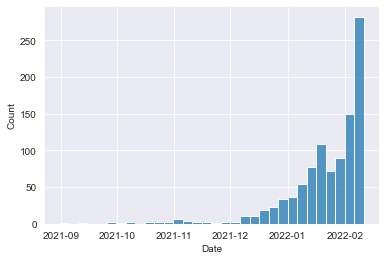

In [14]:
sns.set_style('darkgrid')
sns.histplot(data=data, x="Date")
plt.show()

As we can see, most job opportunities are in 2022.

In [15]:
# caculating the date range
data['Date'].max() - data['Date'].min()

Timedelta('164 days 00:00:00')

## Cleaning the "Job Title"

During the search for jobs that contain "Analista de dados (Data Analyst)" some adjacent jobs may appear in the dataset, such as "Engenheiro de Dados (Data Engineer)" and "Cientista de Dados (Data Scientist)". We will remove jobs that do not represent "Analista de dados (Data Analyst)".

In [16]:
# unique values
data['Job Title'].value_counts()

Analista de Dados                                  66
Engenheiro de Dados                                25
Analista de Banco de Dados                         24
Data Analyst                                       21
Pessoa Engenheira de Dados                         18
                                                   ..
Analista de Dados e Projetos Sênior (Analytics)     1
Product Data Analyst                                1
Analista de Banco de Dados Pleno                    1
Analista de Dados - Growth - Eldorado do Sul        1
Engenheiro de dados - Tech Lead                     1
Name: Job Title, Length: 590, dtype: int64

In [17]:
# keywords list of job titles that interest you
list_jobs = ['analista de dados', 'data analyst']

# selecting only job opportunities with titles containing the keywords
bool_mask = data['Job Title'].str.contains('|'.join(list_jobs), case=False)
data = data[bool_mask]
data.reset_index(drop=True, inplace=True)

In [18]:
data['Job Title'].value_counts()

Analista de Dados                                                    66
Data Analyst                                                         21
Analista de Dados Sênior                                             14
Analista de dados                                                    13
Associate Data Analyst- Customer Experience Group | Bangkok-based    11
                                                                     ..
VAGA ANALISTA DE DADOS | BI                                           1
Analista de Dados Pleno | Time Data                                   1
Data Analyst PL                                                       1
Analista de Dados Sr (100% home office)                               1
Senior Data Analyst (Analista de Mercado Senior)                      1
Name: Job Title, Length: 277, dtype: int64

the column is clean now!

## Cleaning the "Location" column

In [19]:
data['Location'].value_counts()

São Paulo, SP          142
São Paulo, Brasil       55
Brasil                  32
Rio de Janeiro, RJ      29
Curitiba, PR            26
                      ... 
Vila Velha, ES           1
Nova Petrópolis, RS      1
Itajai, RR               1
Lavras, MG               1
Oeiras, PI               1
Name: Location, Length: 72, dtype: int64

Our analysis will address opportunities by state in Brazil. Therefore, the Local column will contain only the acronyms that determine the state.

In [20]:
# filtering entries in the Location column that have the state abbreviation at the end of the string
match = '[A-Z]{2}'
bool_mask = data['Location'].str.contains(match)
data.loc[bool_mask, 'Location']

0         São Paulo, SP
1         São Paulo, SP
3            Osasco, SP
4         São Paulo, SP
6         São Paulo, SP
             ...       
489    Porto Alegre, RS
491    Porto Alegre, RS
492         Vitória, ES
494          Agudos, SP
495       Fortaleza, CE
Name: Location, Length: 363, dtype: object

In [21]:
# Extracting only the acronyms at the end of each string
data.loc[bool_mask, 'Location'] = data.copy().loc[bool_mask, 'Location'].apply(lambda x: x[-2:])

In [22]:
# take a look in the unique values
data['Location'].value_counts()

SP                         192
São Paulo, Brasil           55
Brasil                      32
PR                          32
RJ                          30
SC                          25
São Paulo e Região          24
MG                          23
RS                          23
Porto Alegre e Região        9
DF                           9
PE                           6
GO                           5
CE                           5
Rio de Janeiro, Brasil       4
ES                           4
Goiânia e Região             3
Belém e Região               2
AM                           2
BA                           2
Florianópolis e Região       2
MT                           1
Belo Horizonte e Região      1
Campinas e Região            1
RR                           1
PB                           1
Recife e Região              1
MS                           1
PI                           1
Name: Location, dtype: int64

In [23]:
# Replacing the other entries in the Location column with acronyms
cities_states = {
    'São Paulo, Brasil':'SP',
    'São Paulo e Região':'SP',
    'Brasil':'Unknown',
    'Distrito Federal, Brasil':'DF',
    'Rio de Janeiro, Brasil':'RJ',
    'Ribeirão Preto e Região':'SP',
    'Pará, Brasil':'PA',
    'Belo Horizonte e Região':'MG',
    'Curitiba e Região':'PR',
    'Vitória e Região':'ES',
    'Santa Catarina, Brasil':'SC',
    'Campinas e Região':'SP',
    'Paraná, Brasil':'PR',
    'Porto Alegre e Região' : 'RS',
    'Goiânia e Região' : 'GO',
    'Florianópolis e Região' : 'SC',
    'Belém e Região' : 'PA',
    'Recife e Região' : 'PE'
}

data['Location'] = data['Location'].replace(cities_states)

In [24]:
data['Location'].value_counts()

SP         272
RJ          34
Unknown     32
PR          32
RS          32
SC          27
MG          24
DF           9
GO           8
PE           7
CE           5
ES           4
BA           2
AM           2
PA           2
MS           1
PB           1
RR           1
MT           1
PI           1
Name: Location, dtype: int64

In [25]:
# eliminating entries with unknown location
data = data[data['Location'] != 'Unknown']
data.reset_index(drop=True, inplace=True)

Now the column is ok.

## Cleaning the "Seniority" column

In [26]:
data['Seniority'].value_counts()

Não aplicável    186
Assistente       102
Júnior            92
Pleno-sênior      84
Estágio            1
Name: Seniority, dtype: int64

The column is ok.

## Finding the technologies

In [27]:
# We create columns that will store the occurrence of the following technologies:
# 'git', 'python', 'sql', 'excel', 'power bi', 'tableau', 'Google Sheets', 'SAS'

# tecnologias
tec = [
    'Azure',
    '[\s|\,|\.\;]excel[\s|\,|\.\;]',
    '[\s|\,|\.\;]git[\s|\,|\.\;]',
    'Google[\s]{0,1}Sheets',
    'power[\s]{0,1}bi',
    'Python',
    '[\s|\,|\.\;]r[\s|\,|\.\;]|linguagemr',
    '[\s|\,|\.\;]sas[\s|\,|\.\;]',
    'Sql',   
    'Tableau' 
]

# adding new columns to the dataset informing if the technologies occur (1 = contains and 0 = does not contain)
for name in tec:
    data[name] = data['Description'].str.contains(name, case=False, regex=True).astype(int)
    
    

# renomenando colunas
data.rename(columns={
    'power[\s]{0,1}bi':'Power Bi',
    '[\s|\,|\.\;]git[\s|\,|\.\;]':'Git',
    '[\s|\,|\.\;]excel[\s|\,|\.\;]':'Excel',
    '[\s|\,|\.\;]sas[\s|\,|\.\;]':'Sas',
    '[\s|\,|\.\;]r[\s|\,|\.\;]|linguagemr':'R',
    'Google[\s]{0,1}Sheets' : 'Google Sheets'
}, inplace=True)

In [28]:
# adding an index column to the dataset
data['Index'] = range(len(data))
data['Index'] = data['Index'].astype(str)

# putting the index column in the first position
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]

In [29]:
data.head()

,Index,Date,Job Title,Location,Description,Seniority,Azure,Excel,Git,Google Sheets,Power Bi,Python,R,Sas,Sql,Tableau
0,0,2022-02-11,Analista de Dados,SP,About The Team\n\nAs equipes de Operação do Sh...,Pleno-sênior,0,1,0,0,0,1,0,0,1,0
1,1,2021-11-01,Analista de Dados,SP,Como é o ambiente de trabalho?\n\nO Que Nos Mo...,Não aplicável,0,1,0,0,0,0,0,1,0,1
2,2,2022-02-07,Analista de Dados Jr,SP,"Descrição da empresa\n\nFundada em 2012, a Pit...",Não aplicável,0,0,0,0,0,0,0,0,1,1
3,3,2022-01-21,Analista de Dados | Super App,SP,JOB DESCRIPTION\n\nDirecionar um ou mais clien...,Assistente,0,0,0,0,1,1,1,0,1,1
4,4,2022-02-10,Analista de dados jr,SP,\n JOB DESCRIPTIONDirecionar um ou mais...,Assistente,0,0,0,0,1,1,1,0,1,1


## Output the data

In [30]:
# output the data
data.to_csv('job_data_cleaned.csv', index=False)

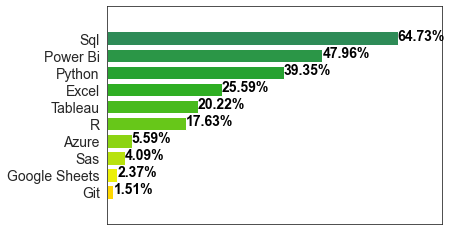

In [45]:
# This cell is dedicated to bar graph plotting usend in the Dashboard

import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np
import seaborn as sns
from colour import Color

# dictionary of total appearances of terms Azure, Excel, Git, Google Sheets, Power Bi, Python, Linguagem R, 
# Sas, Sql e Tableau
tec = ['Azure', 'Excel', 'Git', 'Google Sheets', 'Power Bi', 'Python', 'R', 'Sas', 'Sql', 'Tableau']
valores = [round(data[item].sum()*100/ data.shape[0],2) for item in tec]
list_aparicoes = dict(zip(tec, valores))

# reverse sort dictionary entries by values
list_aparicoes = dict(sorted(list_aparicoes.items(), key=lambda item: item[1], reverse=False))

# rewriting the ordered tec and list_aparicoes lists
tec = list(list_aparicoes.keys())
valores = list(list_aparicoes.values())

# style
sns.set_style('white')


# element positions on the y axis
y_pos = np.arange(len(tec))

# setting the margins
plt.margins(0.15)

# bar colors
red = Color("gold")
colors = list(red.range_to(Color("seagreen"),10))
colors = [color.rgb for color in colors]


# creating the horizontal bars
plt.barh(y_pos, valores, color=colors)

# assigning the names in the y axis
plt.yticks(y_pos, tec, size = 14)

# remove xticks
plt.tick_params(labelleft=True, labelbottom=False)

# percent at the end of each bar
for i in range(len(valores)):
    plt.text(x = valores[i] , y = y_pos[i]-0.1, s=str(valores[i])+'%', size = 14, color='black', fontweight='bold')

plt.show()